In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

<div style="background-color: #3498db; border-radius: 10px; text-align: center; padding: 10px;">
    <h1>Data Loading</h1>
</div>


### We are merging multiple datasets 

In [2]:
account = pd.read_csv("Data/account_activity.csv")
customer = pd.read_csv("Data/customer_data.csv")
fraud = pd.read_csv("Data/fraud_indicators.csv")
suspision = pd.read_csv("Data/suspicious_activity.csv")
merchant = pd.read_csv("Data/merchant_data.csv")
tran_cat = pd.read_csv("Data/transaction_category_labels.csv")
amount = pd.read_csv("Data/amount_data.csv")
anamoly = pd.read_csv("Data/anomaly_scores.csv")
tran_data = pd.read_csv("Data/transaction_metadata.csv")
tran_rec = pd.read_csv("Data/transaction_records.csv")

In [3]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [4]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [5]:
costumer_data = pd.merge(customer, account, on='CustomerID')
costumer_data = pd.merge(costumer_data, suspision, on='CustomerID')
costumer_data

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01,0
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02,0
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03,0
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04,0
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22,0
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23,0
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24,0
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25,0


In [6]:
transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")

In [7]:
transaction_data


,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [132]:
data = pd.merge(transaction_data, costumer_data,on="CustomerID")
data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
1,895,0,Food,90.422026,0.040817,2022-02-07 06:00:00,2149,53.683898,1952,Customer 1952,50,Address 1952,2869.689912,2024-08-09,0
2,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027,Customer 1027,46,Address 1027,9527.947107,2022-01-27,0
3,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
4,544,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,2643,52.991184,1955,Customer 1955,34,Address 1955,9288.355525,2024-08-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,986,0,Other,89.972362,0.285603,2022-02-11 01:00:00,2036,29.328815,1706,Customer 1706,45,Address 1706,1678.514968,2023-12-07,0
996,989,0,Food,17.848481,0.029543,2022-02-11 04:00:00,2284,20.443811,1312,Customer 1312,26,Address 1312,6018.443647,2022-11-08,0
997,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411,Customer 1411,19,Address 1411,1290.323059,2023-02-15,0
998,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566,Customer 1566,39,Address 1566,7067.831609,2023-07-20,0


<div style="background-color: #bde0fe; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Exploration</h1>
</div>


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      1000 non-null   int64  
 1   FraudIndicator     1000 non-null   int64  
 2   Category           1000 non-null   object 
 3   TransactionAmount  1000 non-null   float64
 4   AnomalyScore       1000 non-null   float64
 5   Timestamp          1000 non-null   object 
 6   MerchantID         1000 non-null   int64  
 7   Amount             1000 non-null   float64
 8   CustomerID         1000 non-null   int64  
 9   Name               1000 non-null   object 
 10  Age                1000 non-null   int64  
 11  Address            1000 non-null   object 
 12  AccountBalance     1000 non-null   float64
 13  LastLogin          1000 non-null   object 
 14  SuspiciousFlag     1000 non-null   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 125.0+ KB


In [10]:
data.shape

(1000, 15)

In [11]:
data.describe()

,TransactionID,FraudIndicator,TransactionAmount,AnomalyScore,MerchantID,Amount,CustomerID,Age,AccountBalance,SuspiciousFlag
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.045000,55.853826,0.492282,2504.701000,55.394871,1496.626000,39.848000,5715.455931,0.025000
std,288.819436,0.207408,26.093606,0.288423,288.414883,25.070809,289.229047,13.074932,2540.517262,0.156203
min,1.000000,0.000000,10.057864,0.000234,2001.000000,10.006933,1001.000000,18.000000,1056.301181,0.000000
25%,250.750000,0.000000,33.875129,0.251802,2254.500000,34.502315,1239.000000,29.000000,3489.554711,0.000000
50%,500.500000,0.000000,55.958313,0.490242,2500.500000,57.844325,1501.000000,39.000000,5753.007775,0.000000
75%,750.250000,0.000000,77.589391,0.741888,2761.250000,75.858576,1739.250000,51.000000,7925.710167,0.000000
max,1000.000000,1.000000,99.784323,0.999047,3000.000000,99.887410,2000.000000,64.000000,9999.776239,1.000000


In [12]:

data.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID',
       'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin',
       'SuspiciousFlag'],
      dtype='object')

In [13]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numerical_features)
print(categorical_features)

['TransactionID', 'FraudIndicator', 'TransactionAmount', 'AnomalyScore', 'MerchantID', 'Amount', 'CustomerID', 'Age', 'AccountBalance', 'SuspiciousFlag']
['Category', 'Timestamp', 'Name', 'Address', 'LastLogin']


<div style="background-color: #cdb4db; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Visualization</h1>
</div>


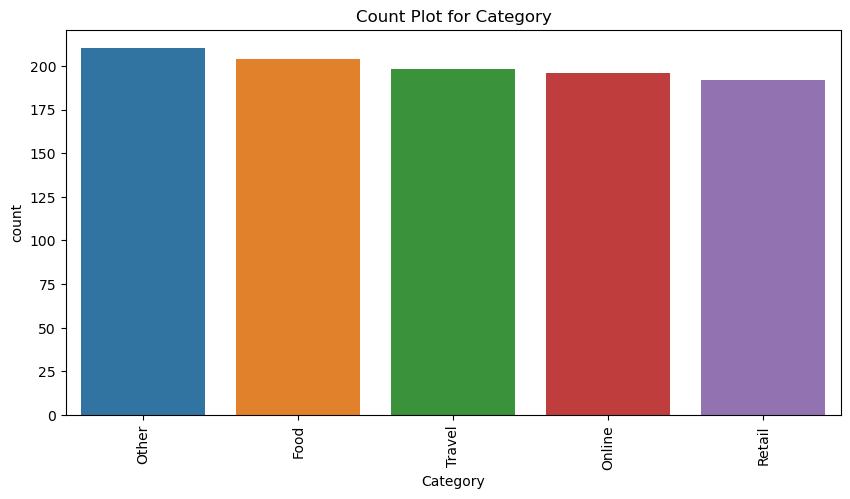

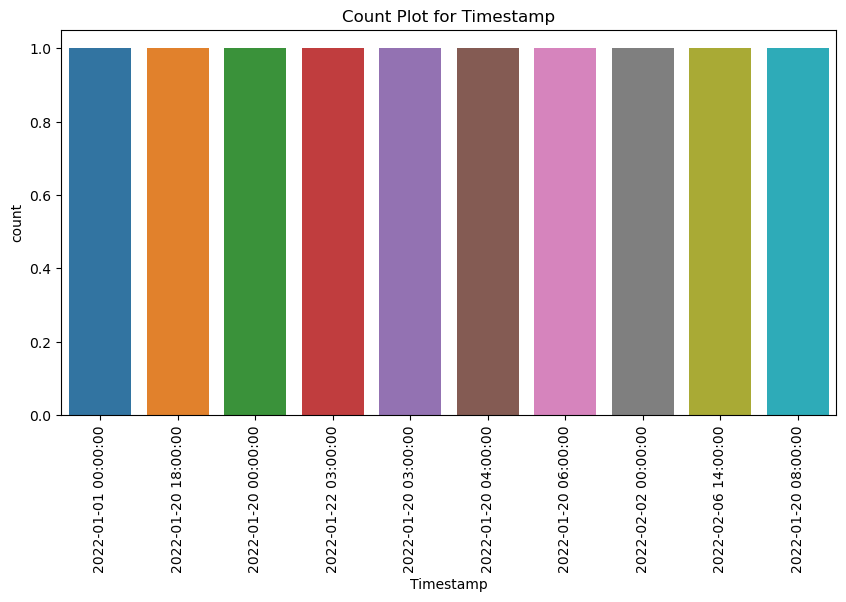

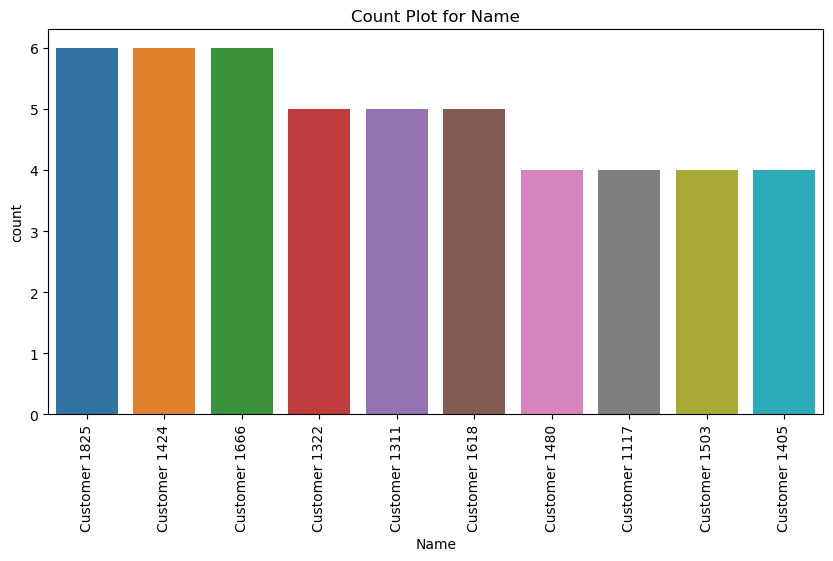

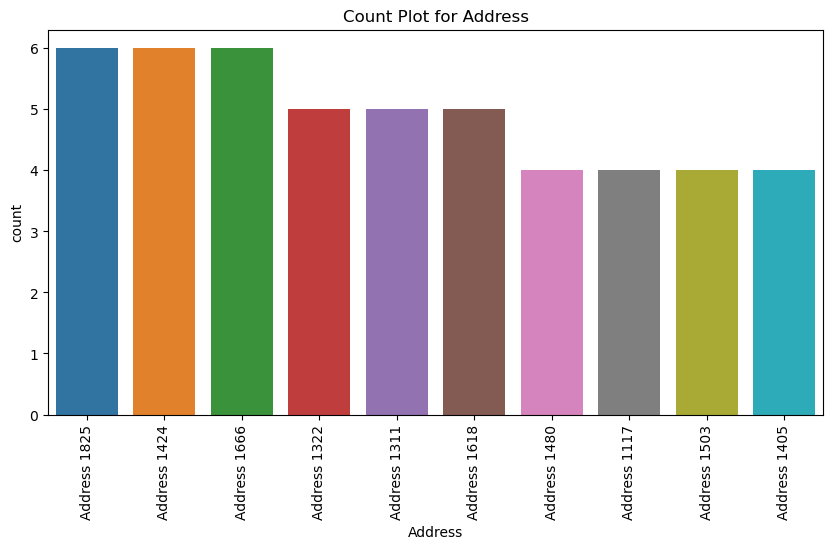

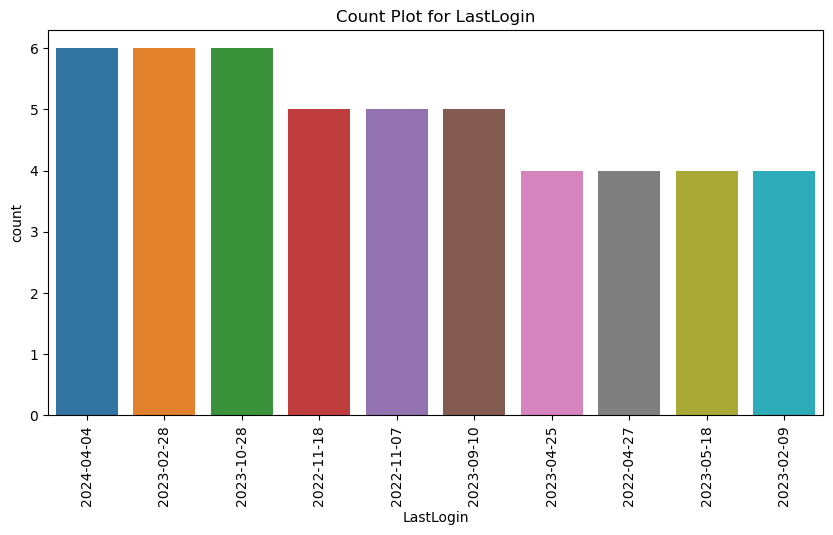

In [14]:
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()


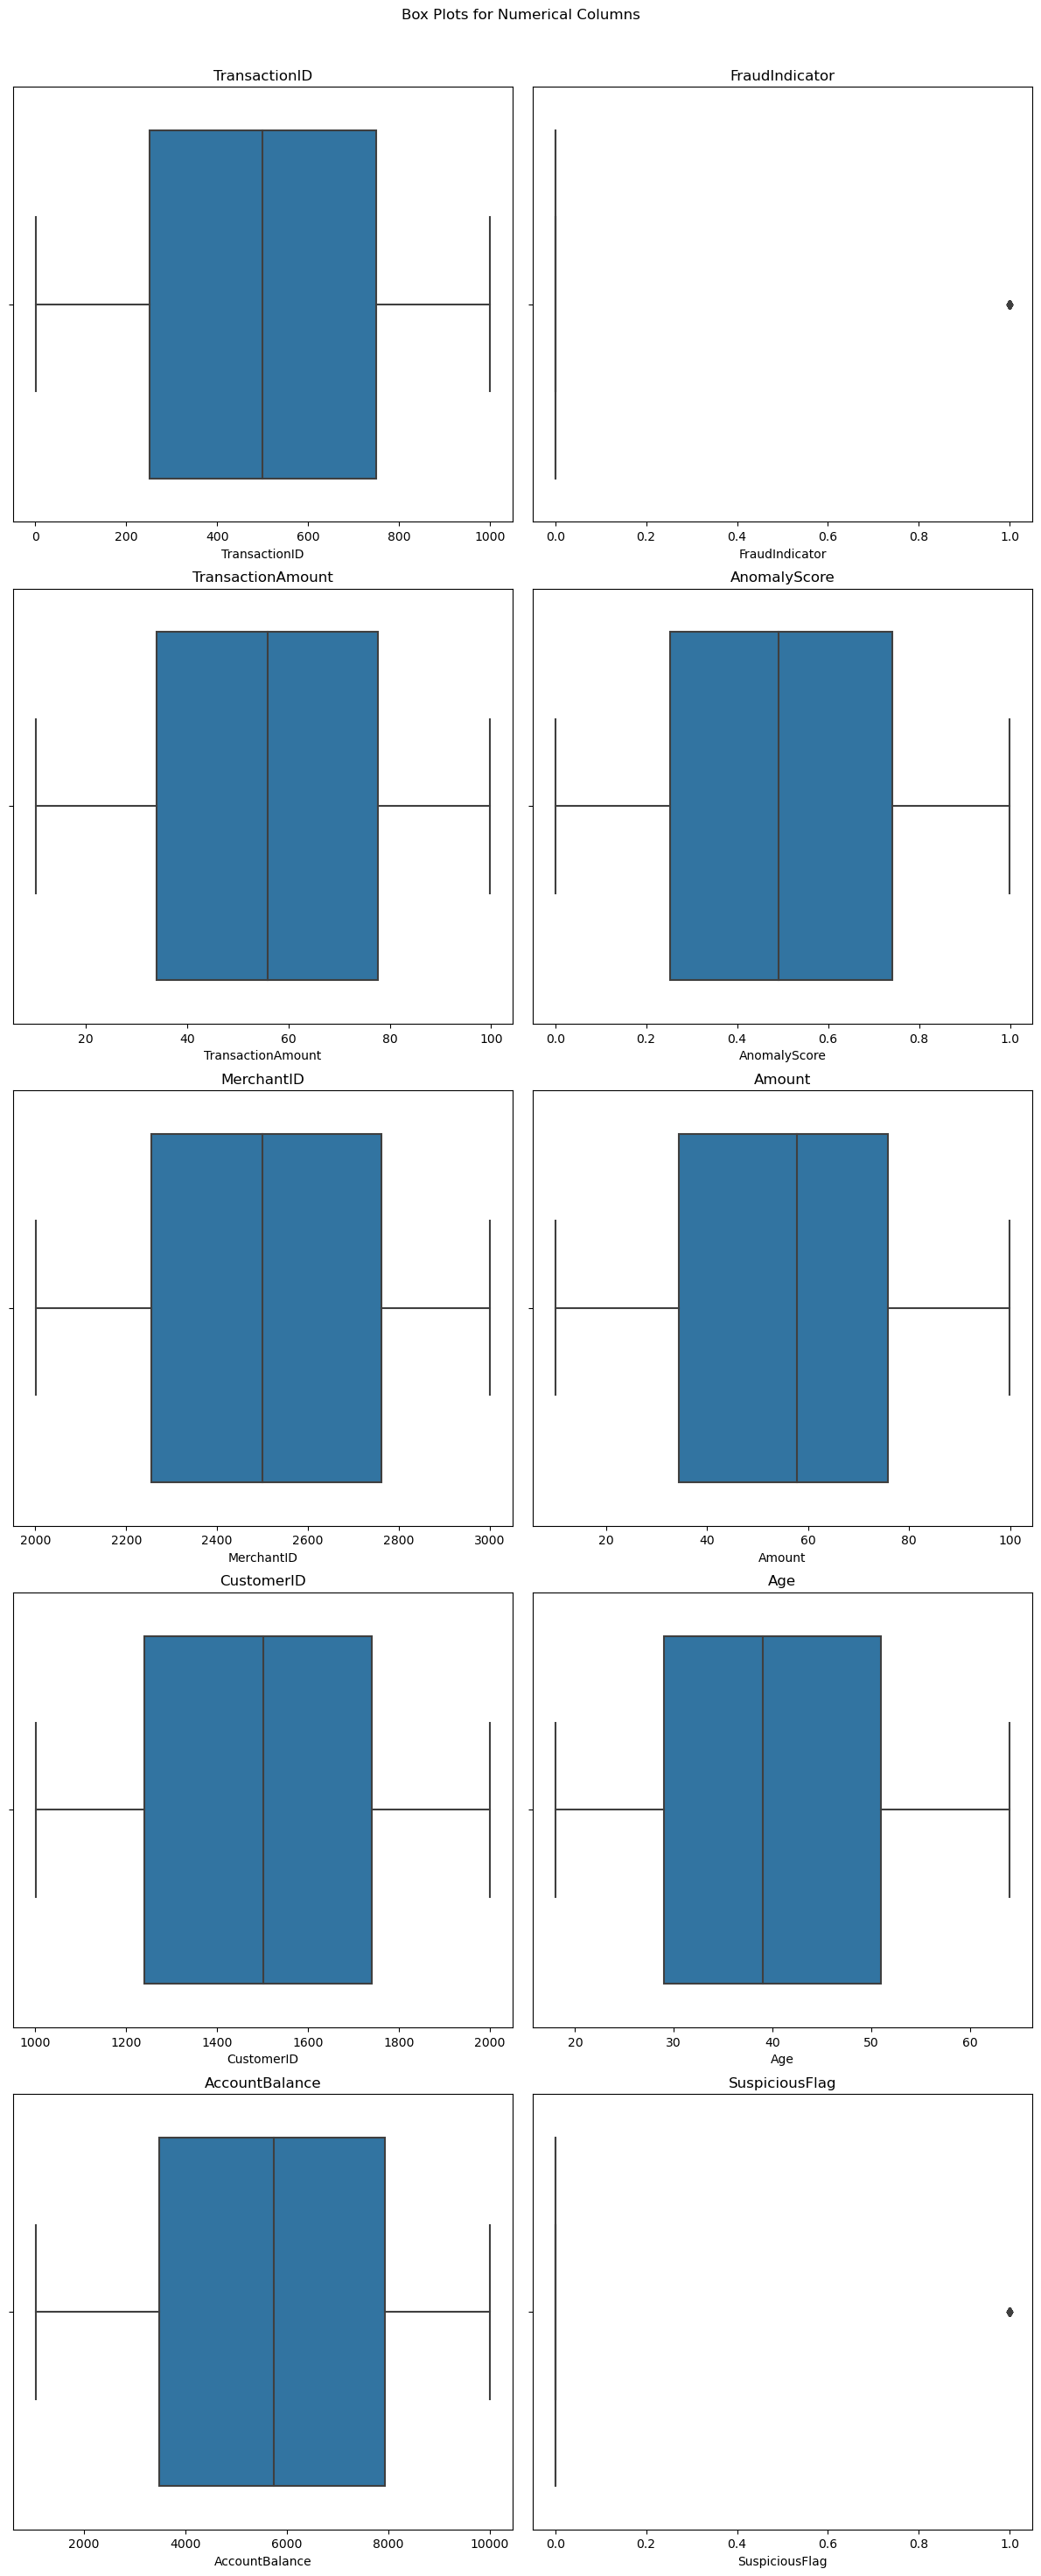

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()


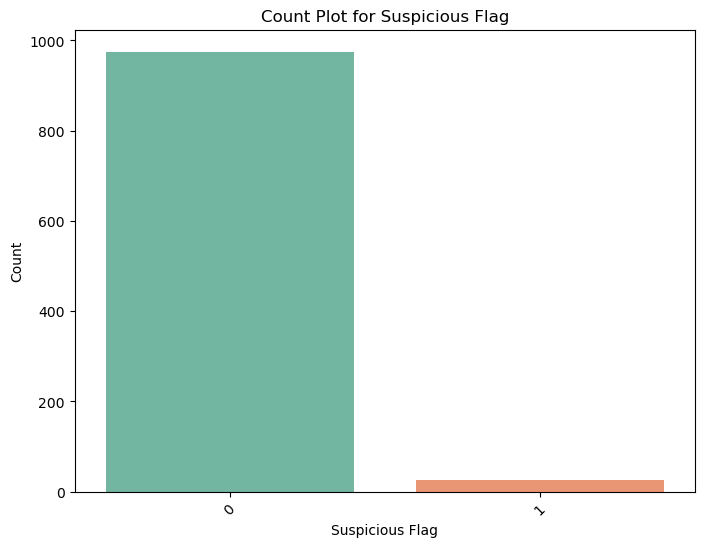

In [16]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

### Okay we can see the dataset's target feature is heavily imbalanced sowe can use further techiniqes to equalize the feature's values 

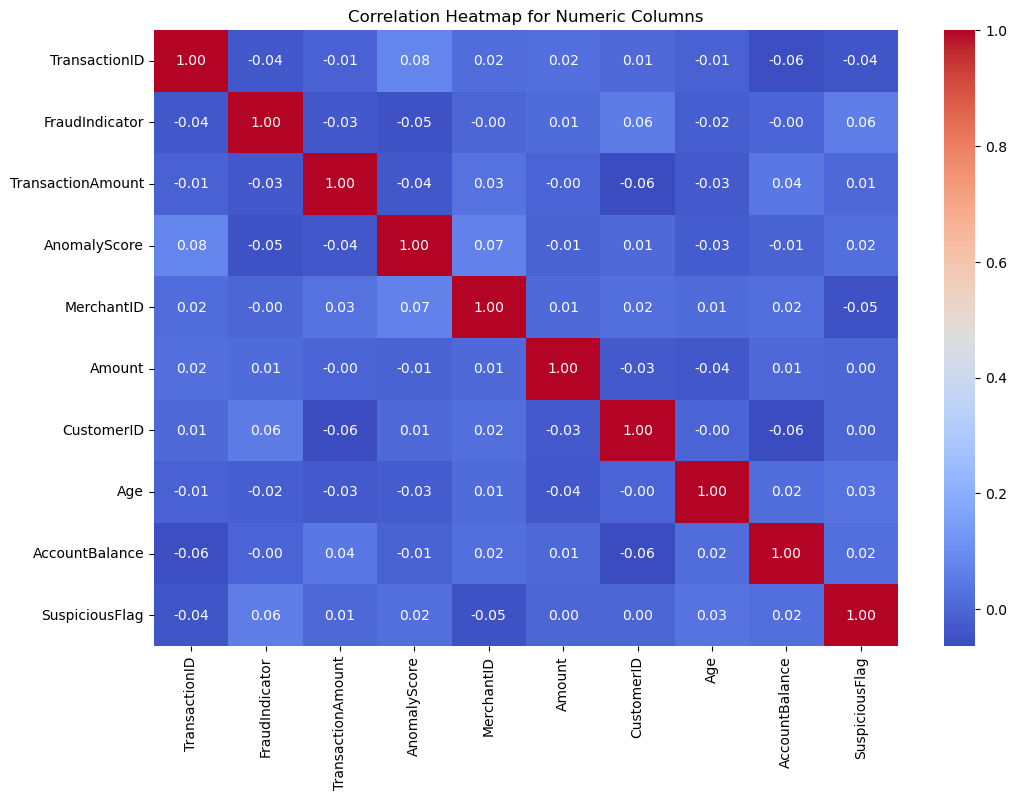

In [17]:

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()


In [18]:
# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [19]:
data1 = data.drop(columns_to_be_dropped, axis=1)
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0


In [135]:
fraud_cases = data1.query('FraudIndicator == 1').head(5)
print(fraud_cases)


     FraudIndicator Category  TransactionAmount  AnomalyScore  \
18                1   Retail          75.659944      0.010471   
22                1   Travel          78.346754      0.830407   
35                1     Food          79.679529      0.252012   
86                1    Other          11.939593      0.006120   
130               1   Online          53.916742      0.161773   

               Timestamp     Amount  AccountBalance  LastLogin  \
18   2022-01-01 08:00:00  37.182412     8935.007146 2022-12-13   
22   2022-01-16 03:00:00  61.136532     4344.549864 2023-02-28   
35   2022-01-01 18:00:00  13.615519     8326.149989 2023-10-13   
86   2022-01-03 00:00:00  30.793728     6552.420255 2024-01-22   
130  2022-01-03 23:00:00  57.316159     7665.932450 2022-10-13   

     SuspiciousFlag          Timestamp1  Hour  gap  
18                0 2022-01-01 08:00:00     8  346  
22                0 2022-01-16 03:00:00     3  408  
35                0 2022-01-01 18:00:00    18  650  


In [20]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(0    955
 1     45
 Name: FraudIndicator, dtype: int64,
 0    975
 1     25
 Name: SuspiciousFlag, dtype: int64,
 Other     210
 Food      204
 Travel    198
 Online    196
 Retail    192
 Name: Category, dtype: int64)

<div style="background-color: #ffc8dd; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Feature Engineering</h1>
</div>


In [21]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is not in datetime format.


Converting TimeStamp to datetime format

In [22]:
data1['Timestamp1'] = pd.to_datetime(data1['Timestamp'])

print(data1.dtypes)

FraudIndicator                int64
Category                     object
TransactionAmount           float64
AnomalyScore                float64
Timestamp                    object
Amount                      float64
AccountBalance              float64
LastLogin                    object
SuspiciousFlag                int64
Timestamp1           datetime64[ns]
dtype: object


In [23]:
data1['Hour'] = data1['Timestamp1'].dt.hour

In [24]:
data1['LastLogin'] = pd.to_datetime(data1['LastLogin'])

In [25]:
data1['gap'] = (data1['Timestamp1'] - data1['LastLogin']).dt.days.abs()

In [26]:
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag,Timestamp1,Hour,gap
0,0,Other,79.413607,0.686699,2022-01-01 00:00:00,55.530334,2869.689912,2024-08-09,0,2022-01-01 00:00:00,0,951
1,0,Food,90.422026,0.040817,2022-02-07 06:00:00,53.683898,2869.689912,2024-08-09,0,2022-02-07 06:00:00,6,914
2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,12.881180,9527.947107,2022-01-27,0,2022-01-01 01:00:00,1,26
3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,50.176322,9288.355525,2024-08-12,0,2022-01-01 02:00:00,2,954
4,0,Retail,20.295348,0.476812,2022-01-23 15:00:00,52.991184,9288.355525,2024-08-12,0,2022-01-23 15:00:00,15,932


<div style="background-color: #ccd5ae; border-radius: 10px; text-align: center; padding: 20px;">
    <h1 style="color: black;">Data Modelling</h1>
</div>


In [27]:
X = data1.drop(['FraudIndicator','Timestamp','Timestamp1','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [28]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag,Hour,gap
0,2,79.413607,0.686699,55.530334,2869.689912,0,0,951
1,0,90.422026,0.040817,53.683898,2869.689912,0,6,914
2,1,12.053087,0.081749,12.881180,9527.947107,0,1,26
3,4,33.310357,0.023857,50.176322,9288.355525,0,2,954
4,3,20.295348,0.476812,52.991184,9288.355525,0,15,932
...,...,...,...,...,...,...,...,...
995,2,89.972362,0.285603,29.328815,1678.514968,0,1,664
996,0,17.848481,0.029543,20.443811,6018.443647,0,4,270
997,0,89.457059,0.266778,19.876750,1290.323059,0,11,369
998,3,47.958030,0.512483,96.299792,7067.831609,0,12,524


train,test,splitting the data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [30]:
X_train.shape,Y_test.shape

((800, 8), (200,))

In [31]:
# Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.955


##### High accuracy is not often a good thing in a machine learning model as it states the problem of imbalanced dataset

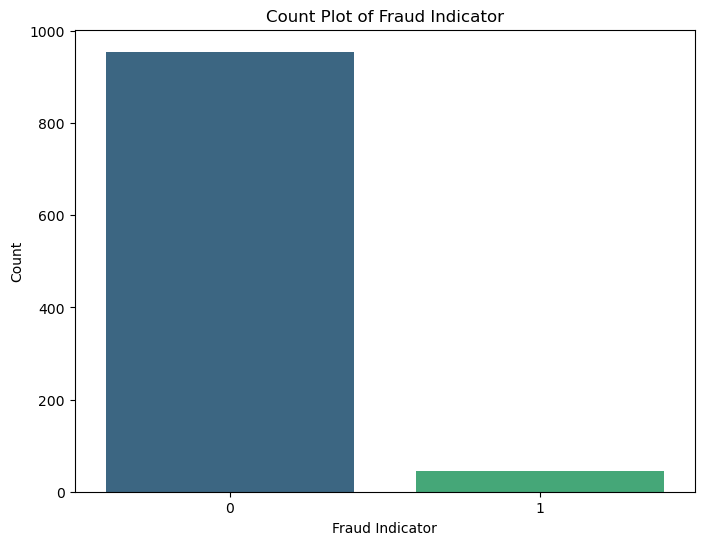

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


Class distribution after oversampling: Counter({0: 955, 1: 955})


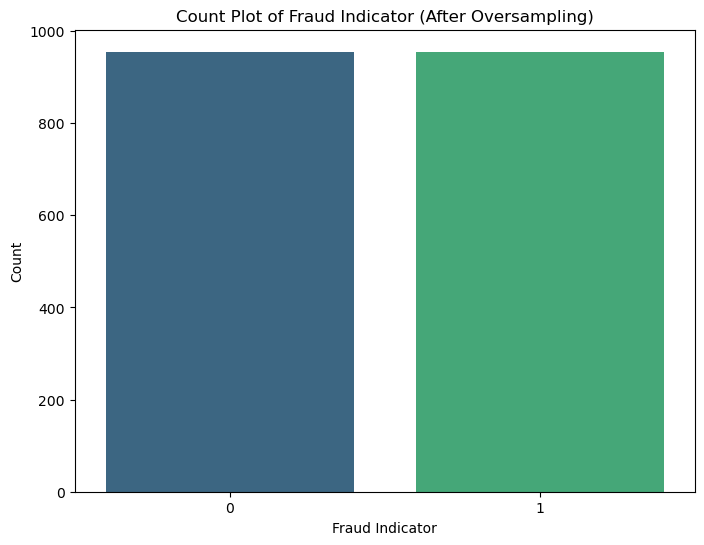

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()


In [34]:
# Retraining Logistic regression using SAMPLED Data

model = LogisticRegression()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 0.555
Precision: 0.045454545454545456
Recall: 0.4444444444444444
F1 Score: 0.08247422680412371
Confusion Matrix:
[[107  84]
 [  5   4]]


## HYPERPARAMETER TUNING

In [35]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
model = LogisticRegression()

# Define a range of hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength (smaller values for stronger regularization)
    'solver': ['liblinear'],  # Solver for l1 regularization
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the resampled data
y_pred = best_model.predict(X_resampled)

# Calculate and print various metrics to evaluate the model's performance on the resampled data
accuracy = accuracy_score(y_resampled, y_pred)
precision = precision_score(y_resampled, y_pred)
recall = recall_score(y_resampled, y_pred)
f1 = f1_score(y_resampled, y_pred)
confusion = confusion_matrix(y_resampled, y_pred)

print("Model Evaluation Metrics on Resampled Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Model Evaluation Metrics on Resampled Data:
Accuracy: 0.6350785340314136
Precision: 0.625242718446602
Recall: 0.6743455497382199
F1 Score: 0.6488664987405542
Confusion Matrix:
[[569 386]
 [311 644]]


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

def evaluate_classification_models(X_resampled, y_resampled):
    # Split the resampled data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    # Define a dictionary of classification models
    models = {
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "Random Forest Classifier": RandomForestClassifier(),
        "Support Vector Machine (SVM)": SVC(),
        "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
        "Gradient Boosting Classifier": GradientBoostingClassifier()
    }
    
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate and store various metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        
        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": confusion
        }
    
    return results

results = evaluate_classification_models(X_resampled, y_resampled)
for model_name, model_result in results.items():
     print(f"Results for {model_name}:")
     for metric, value in model_result.items():
         print(f"{metric}: {value}")
     print()


Results for Decision Tree Classifier:
Accuracy: 0.8743455497382199
Precision: 0.8512820512820513
Recall: 0.8972972972972973
F1 Score: 0.8736842105263158
Confusion Matrix: [[168  29]
 [ 19 166]]

Results for Random Forest Classifier:
Accuracy: 0.9240837696335078
Precision: 0.875
Recall: 0.9837837837837838
F1 Score: 0.9262086513994912
Confusion Matrix: [[171  26]
 [  3 182]]

Results for Support Vector Machine (SVM):
Accuracy: 0.5235602094240838
Precision: 0.5062240663900415
Recall: 0.6594594594594595
F1 Score: 0.5727699530516432
Confusion Matrix: [[ 78 119]
 [ 63 122]]

Results for K-Nearest Neighbors (KNN):
Accuracy: 0.8324607329842932
Precision: 0.7665198237885462
Recall: 0.9405405405405406
F1 Score: 0.8446601941747574
Confusion Matrix: [[144  53]
 [ 11 174]]

Results for Gradient Boosting Classifier:
Accuracy: 0.8691099476439791
Precision: 0.8026905829596412
Recall: 0.9675675675675676
F1 Score: 0.8774509803921569
Confusion Matrix: [[153  44]
 [  6 179]]



# Ranking Models perfromance
1. Random Forest Classifier
2. Gradient Boosting Algorithm
3. Decision Tree Classifier
4. K-Nearest Neighbours
5. Support Vector Machine (SVC)
6. Logistic Regression

### Now we can HyperParameterTune the <h1><b>RandomForest CLassifier</b></h1>

In [148]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Best Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Evaluation Metrics:
Accuracy: 0.9214659685863874
Precision: 0.8770226537216829
Recall: 0.9748201438848921
F1 Score: 0.9233390119250426
Confusion Matrix:
[[257  38]
 [  7 271]]


In [44]:
import joblib


joblib.dump(best_rf_model, 'random_forest_model.joblib')
import joblib

# Assuming you have a LabelEncoder instance named 'label_encoder'
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

In [75]:
def predict_fraud(input_features):
    # Load the trained Random Forest model
    model = joblib.load('random_forest_model.joblib')

    # Load the label encoder
    label_encoder = joblib.load('label_encoder.joblib')

    # Convert the input features to a DataFrame (adjust as necessary)
    input_data = pd.DataFrame([input_features], columns=['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag', 'Hour', 'gap'])
    
    # Transform the categorical data
    input_data['Category'] = label_encoder.transform(input_data['Category'])

    # Make a prediction
    prediction = model.predict(input_data)
    
    return prediction[0]

input_features = ('Travel', 0.41, 0.68, 0.53, 0.68000, 1, 1, 2)
prediction = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)


Predicted Fraud Indicator: 0


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features (important for models that are sensitive to the scale of features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, predictions))

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       193
           1       0.00      0.00      0.00         7

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.93      0.96      0.95       200

                   importance
Amount               0.177440
AccountBalance       0.169439
AnomalyScore         0.167685
gap                  0.158237
TransactionAmount    0.154478
Hour                 0.104737
Category             0.048912
SuspiciousFlag       0.019073


In [108]:
import joblib
import pandas as pd

def predict_fraud(input_features):
    # Load the trained Random Forest model
    model = joblib.load('random_forest_model.joblib')

    # Load the label encoder
    label_encoder = joblib.load('label_encoder.joblib')

    # Convert the input features to a DataFrame (adjust as necessary)
    input_data = pd.DataFrame([input_features], columns=['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag', 'Hour', 'gap'])
    
    # Transform the categorical data
    input_data['Category'] = label_encoder.transform(input_data['Category'])

    # Make a prediction
    prediction = model.predict(input_data)
    prediction_prob = model.predict_proba(input_data)
    
    return prediction[0], prediction_prob[0][1]

input_features = ('Travel', 0.41, 0.68, 0.53, 0.68000, 1, 1, 2)
prediction, prediction_prob = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)
print("Prediction Probability for Class 1:", prediction_prob)


Predicted Fraud Indicator: 0
Prediction Probability for Class 1: 0.08


In [139]:
input_features = ('Travel', 1000, 0.9, 5000, 500, 1, 1, 50)
prediction, prediction_prob = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)
print("Prediction Probability for Class 1:", prediction_prob)


Predicted Fraud Indicator: 0
Prediction Probability for Class 1: 0.16666666666666666


In [109]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weights = {i: weights[i] for i in range(2)}

# Initialize and train the model with class weights
model = RandomForestClassifier(random_state=42, class_weight=class_weights)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the model
model.fit(X_train_scaled_resampled, y_train_resampled)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, predictions))


ValueError: Found input variables with inconsistent numbers of samples: [800, 1337]

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [113]:
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_scaled: (800, 8)
Shape of y_train: (800,)


In [115]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


class_weights = {0: 1, 1: 10}
model = RandomForestClassifier(random_state=42, class_weight=class_weights)
model.fit(X_train_scaled, y_train)


# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Evaluate the model
report = classification_report(y_test, predictions)
print(report)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       193
           1       0.00      0.00      0.00         7

    accuracy                           0.96       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.93      0.96      0.95       200

                   importance
Amount               0.174159
gap                  0.171410
AnomalyScore         0.168839
TransactionAmount    0.156643
AccountBalance       0.137127
Hour                 0.108440
Category             0.061263
SuspiciousFlag       0.022118


In [118]:
class_weights = {0: 1, 1: 50}  # or a different value that suits your problem
model = RandomForestClassifier(random_state=42, class_weight=class_weights)
model.fit(X_train_scaled, y_train)
from imblearn.over_sampling import BorderlineSMOTE, SVMSMOTE, ADASYN

smote = BorderlineSMOTE(random_state=42)
X_train_scaled_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

model.fit(X_train_scaled_resampled, y_train_resampled)
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=50, random_state=42)
model.fit(X_train_scaled, y_train)


ModuleNotFoundError: No module named 'xgboost'

In [123]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(scale_pos_weight=50, 
                       max_depth=3, 
                       n_estimators=100, 
                       learning_rate=0.1, 
                       random_state=42)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))
X_train_scaled

[LightGBM] [Info] Number of positive: 38, number of negative: 762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1306
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.047500 -> initscore=-2.998360
[LightGBM] [Info] Start training from score -2.998360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [124]:
# Save the model
model.booster_.save_model('lightgbm_model.txt')


In [130]:
import lightgbm as lgb
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load the trained LightGBM model
clf = lgb.Booster(model_file='lightgbm_model.txt')

# Input features: ('Category', 'Amount', 'gap', 'AnomalyScore', 'TransactionAmount', 'AccountBalance', 'Hour', 'SuspiciousFlag')
input_features = ('Travel', 0.41, 0.68, 0.53, 0.68, 1, 1, 2)

# Load the LabelEncoder and StandardScaler (you should have saved these objects during training)
label_encoder = joblib.load('label_encoder.pkl')
scaler = joblib.load('scaler.pkl')

try:
    # Apply the label encoder to the 'Category' feature
    category_encoded = label_encoder.transform([input_features[0]])[0]
except ValueError:
    # Handle unknown categories here. For example, you can assign a default value or raise an error.
    category_encoded = default_value  # Replace with your chosen method of handling unknown categories

# Replace the 'Category' in input_features with its numeric representation
input_features_encoded = [category_encoded] + list(input_features[1:])

# Convert the entire feature vector to a numpy array
input_features_array = np.array(input_features_encoded).reshape(1, -1)

# Apply the scaler to the entire feature vector
input_features_scaled = scaler.transform(input_features_array)

# Make a prediction
prediction = clf.predict(input_features_scaled)

print("Prediction:", prediction)


NameError: name 'default_value' is not defined

In [131]:
X_train_scaled, y_train

(array([[-8.92004585e-04, -7.60554473e-01,  1.15788528e+00, ...,
         -1.64187813e-01,  3.78690230e-01, -5.73267516e-01],
        [ 7.12711664e-01,  1.33854641e+00, -8.78340845e-01, ...,
         -1.64187813e-01,  1.53720719e+00, -1.29451761e+00],
        [ 7.12711664e-01,  6.70906076e-01,  1.44589153e+00, ...,
         -1.64187813e-01,  5.23504850e-01,  2.45542973e-01],
        ...,
        [ 1.42631533e+00,  1.53406157e+00, -8.24547731e-01, ...,
         -1.64187813e-01,  5.23504850e-01,  2.31605773e-01],
        [ 1.42631533e+00,  7.93430132e-01, -2.97164044e-01, ...,
         -1.64187813e-01, -1.21427059e+00, -2.38774720e-01],
        [-1.42809934e+00,  1.17634445e+00,  4.47483840e-01, ...,
         -1.64187813e-01, -3.45382868e-01, -2.87554920e-01]]),
 29     0
 535    0
 695    0
 557    0
 836    0
       ..
 106    0
 270    1
 860    0
 435    0
 102    0
 Name: FraudIndicator, Length: 800, dtype: int64)

In [133]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import joblib



df = pd.DataFrame(data)

# Preprocessing
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

scaler = StandardScaler()
df[['TransactionAmount', 'AnomalyScore', 'Amount']] = scaler.fit_transform(df[['TransactionAmount', 'AnomalyScore', 'Amount']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['TransactionID', 'FraudIndicator', 'Timestamp', 'MerchantID', 'CustomerID'], axis=1), df['FraudIndicator'], test_size=0.2, random_state=42)

# Train a LightGBM model
model = lgb.LGBMClassifier(scale_pos_weight=50, max_depth=3, n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Save the model and preprocessing objects
joblib.dump(model, 'lgb_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')


ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Name: object, Address: object, LastLogin: object

In [146]:
input_features = ('Retail', 75.659944, 0.010471, 37.182412, 8935.007146, 0, 8, 346)
prediction, prediction_prob = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)
print("Prediction Probability for Class 1:", prediction_prob)

Predicted Fraud Indicator: 1
Prediction Probability for Class 1: 0.8666666666666667


In [143]:
fraud_cases = data1.query('FraudIndicator == 1').head(5)
print(fraud_cases)


     FraudIndicator Category  TransactionAmount  AnomalyScore  \
18                1   Retail          75.659944      0.010471   
22                1   Travel          78.346754      0.830407   
35                1     Food          79.679529      0.252012   
86                1    Other          11.939593      0.006120   
130               1   Online          53.916742      0.161773   

               Timestamp     Amount  AccountBalance  LastLogin  \
18   2022-01-01 08:00:00  37.182412     8935.007146 2022-12-13   
22   2022-01-16 03:00:00  61.136532     4344.549864 2023-02-28   
35   2022-01-01 18:00:00  13.615519     8326.149989 2023-10-13   
86   2022-01-03 00:00:00  30.793728     6552.420255 2024-01-22   
130  2022-01-03 23:00:00  57.316159     7665.932450 2022-10-13   

     SuspiciousFlag          Timestamp1  Hour  gap  
18                0 2022-01-01 08:00:00     8  346  
22                0 2022-01-16 03:00:00     3  408  
35                0 2022-01-01 18:00:00    18  650  


In [147]:
def predict_fraud(input_features):
    # Load the trained Random Forest model
    model = joblib.load('random_forest_model.joblib')

    # Load the label encoder
    label_encoder = joblib.load('label_encoder.joblib')

    # Convert the input features to a DataFrame (adjust as necessary)
    input_data = pd.DataFrame([input_features], columns=['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag', 'Hour', 'gap'])
    
    # Transform the categorical data
    input_data['Category'] = label_encoder.transform(input_data['Category'])

    # Make a prediction
    prediction = model.predict(input_data)
    
    return prediction[0]

input_features = ('Retail', 75.659944, 0.010471, 37.182412, 8935.007146, 0, 8, 346)

prediction = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)


Predicted Fraud Indicator: 1


In [149]:
import pickle

# Assuming `model` is your trained Random Forest model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)


In [150]:
import pickle

with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [153]:
import pandas as pd
import pickle

def predict_fraud(input_features):
    # Load the trained Random Forest model
    with open('random_forest_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Load the label encoder
    with open('label_encoder.pkl', 'rb') as f:
        label_encoder = pickle.load(f)

    # Convert the input features to a DataFrame (adjust as necessary)
    input_data = pd.DataFrame([input_features], columns=['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag', 'Hour', 'gap'])
    
    # Transform the categorical data
    input_data['Category'] = label_encoder.transform(input_data['Category'])

    # Make a prediction
    prediction = model.predict(input_data)
    
    return prediction[0]

input_features = ('Retail', 75.659944, 0.010471, 37.182412, 8935.007146, 0, 8, 346)

prediction = predict_fraud(input_features)
print("Predicted Fraud Indicator:", prediction)


Predicted Fraud Indicator: 1
